<a href="https://colab.research.google.com/github/gabrielcgo/PROJETOBLUESUB/blob/main/notebooks/work/An%C3%A1lise_Explanat%C3%B3ria_COVID19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Explorando o dataset

In [2]:
df = pd.read_csv('/content/full_grouped.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [4]:
df.tail()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa
35155,2020-07-27,Zimbabwe,2704,36,542,2126,192,2,24,Africa


# Removendo dados faltantes

In [5]:
df.isnull().sum()

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64

# Mineração de dados

In [6]:
df = df.drop(columns=['Country/Region', 'Active', 'New cases', 'New deaths', 'New recovered'])

In [7]:
df.head()

,Date,Confirmed,Deaths,Recovered,WHO Region
0,2020-01-22,0,0,0,Eastern Mediterranean
1,2020-01-22,0,0,0,Europe
2,2020-01-22,0,0,0,Africa
3,2020-01-22,0,0,0,Europe
4,2020-01-22,0,0,0,Africa


In [8]:
df.tail()

,Date,Confirmed,Deaths,Recovered,WHO Region
35151,2020-07-27,10621,78,3752,Eastern Mediterranean
35152,2020-07-27,10,1,8,Africa
35153,2020-07-27,1691,483,833,Eastern Mediterranean
35154,2020-07-27,4552,140,2815,Africa
35155,2020-07-27,2704,36,542,Africa


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        35156 non-null  object
 1   Confirmed   35156 non-null  int64 
 2   Deaths      35156 non-null  int64 
 3   Recovered   35156 non-null  int64 
 4   WHO Region  35156 non-null  object
dtypes: int64(3), object(2)
memory usage: 1.3+ MB


In [39]:
df['WHO Region'].unique()


array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [61]:
df_region = df.groupby(['WHO Region', 'Date']).sum().reset_index()


In [62]:
df_region.head()

,WHO Region,Date,Confirmed,Deaths,Recovered
0,Africa,2020-01-22,0,0,0
1,Africa,2020-01-23,0,0,0
2,Africa,2020-01-24,0,0,0
3,Africa,2020-01-25,0,0,0
4,Africa,2020-01-26,0,0,0


In [65]:
df_region.describe()

,Confirmed,Deaths,Recovered
count,1.128000e+03,1128.00000,1.128000e+03
mean,7.344933e+05,38461.79344,3.443335e+05
std,1.384210e+06,73213.30569,6.667663e+05
min,0.000000e+00,0.00000,0.000000e+00
25%,3.881250e+03,112.75000,1.942500e+02
50%,1.404940e+05,4981.50000,7.052550e+04
75%,7.995718e+05,24434.00000,3.156425e+05
max,8.839286e+06,342732.00000,4.468616e+06


In [63]:
df_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   WHO Region  1128 non-null   object
 1   Date        1128 non-null   object
 2   Confirmed   1128 non-null   int64 
 3   Deaths      1128 non-null   int64 
 4   Recovered   1128 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 44.2+ KB


#   Visualização gráfica

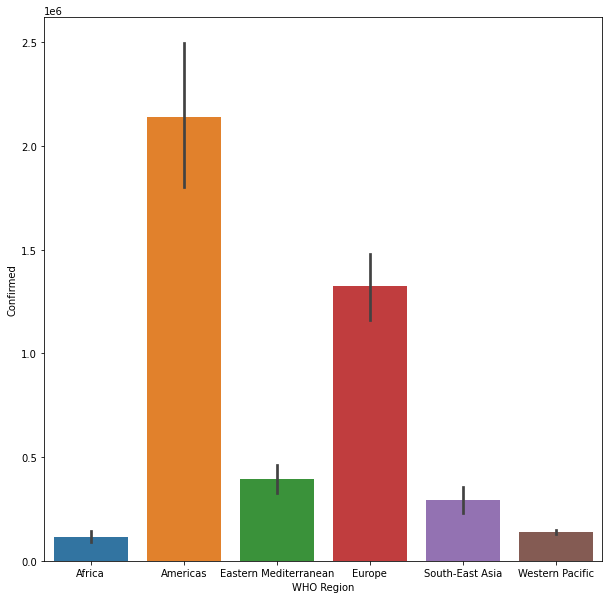

In [71]:
plt.figure(figsize=(10,10))
sns.barplot(x='WHO Region', y='Confirmed', data=df_region)

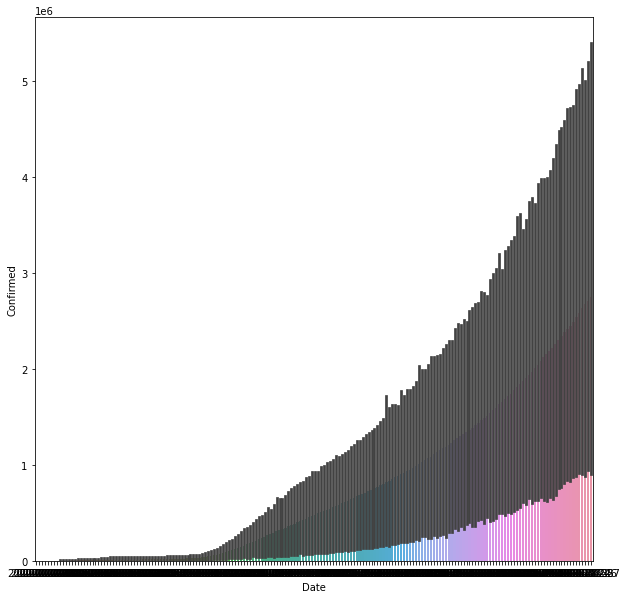

In [72]:
plt.figure(figsize=(10,10))
sns.barplot(x='Date', y='Confirmed', data=df_region)